In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

## Ex. 5.3

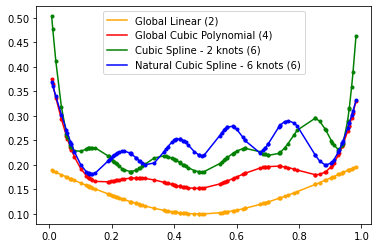

In [2]:
def pc(x, loc):
    return ((x - loc) ** 3) * (x > loc)
    
x = np.sort(uniform.rvs(size = 100)).reshape([-1, 1])
X_Linear = np.hstack([np.ones_like(x), x])
X_Cubic = np.hstack([X_Linear, x ** 2, x ** 3])
X_Cubic_Spline = np.hstack([X_Cubic, pc(x, 1/3), pc(x, 2/3)])
knots = np.linspace(0.1, 0.9, 6)
X_tmp = np.hstack([(pc(x, knot) - pc(x, knots[-1])) / (knots[-1] - knot) for knot in knots[:-1]])
X_tmp = X_tmp[:, :-1] - X_tmp[:, -1].reshape([-1, 1])
X_Natural_Cubic_Spline  = np.hstack([X_Linear, X_tmp])

def pv(X):
    return np.sqrt(np.diag(X.dot(np.linalg.inv(X.T.dot(X))).dot(X.T)))

plt.plot(x.flatten(), pv(X_Linear), '.', c='orange')
plt.plot(x.flatten(), pv(X_Linear), c='orange', label='Global Linear ({})'
         .format(X_Linear.shape[1]))
plt.plot(x.flatten(), pv(X_Cubic), '.', c='red')
plt.plot(x.flatten(), pv(X_Cubic), c='red', label='Global Cubic Polynomial ({})'
         .format(X_Cubic.shape[1]))
plt.plot(x.flatten(), pv(X_Cubic_Spline), '.', c='green')
plt.plot(x.flatten(), pv(X_Cubic_Spline), c='green', label='Cubic Spline - 2 knots ({})'
         .format(X_Cubic_Spline.shape[1]))
plt.plot(x.flatten(), pv(X_Natural_Cubic_Spline), '.', c='blue')
plt.plot(x.flatten(), pv(X_Natural_Cubic_Spline), c='blue', label='Natural Cubic Spline - 6 knots ({})'
         .format(X_Natural_Cubic_Spline.shape[1]))
plt.legend()
plt.show()

## Ex. 5.5

In [3]:
X = pd.read_csv('./data/phoneme.txt', index_col=0)
X_train = X[X.speaker.str.startswith('train')]
X_test = X[~X.speaker.str.startswith('train')]
X_train.pop('speaker')
X_test.pop('speaker')
y_train = X_train.pop('g')
y_test = X_test.pop('g')

fit1 = LDA().fit(X_train, y_train)
result1 = fit1.score(X_train, y_train), fit1.score(X_test, y_test)
fit2 = QDA().fit(X_train, y_train)
result2 = fit2.score(X_train, y_train), fit2.score(X_test, y_test)

print(result1)
print(result2)

(0.9440119760479042, 0.9195893926432849)
(1.0, 0.8417450812660393)


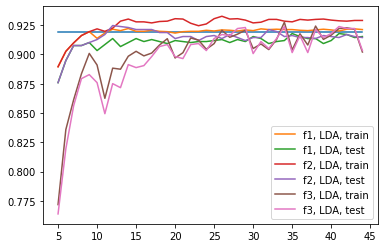

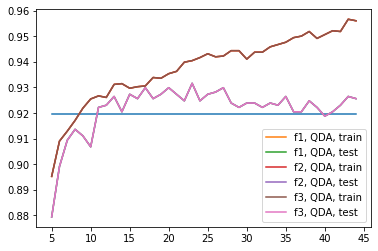

Why LDA not invariant? Why QDA invariant? 


In [4]:
freq = np.linspace(1, 256, 256).reshape([-1, 1])
def make_filter(N):
    freq_Linear = np.hstack([np.ones_like(freq), freq])
    knots = np.linspace(255/(2*N), 255 - 255/(2*N), N)
    freq_tmp = np.hstack([(pc(freq, knot) - pc(freq, knots[-1])) / (knots[-1] - knot) for knot in knots[:-1]])
    freq_tmp = freq_tmp[:, :-1] - freq_tmp[:, -1].reshape([-1, 1])
    freq_Natural_Cubic_Spline  = np.hstack([freq_Linear, freq_tmp])
    return freq_Natural_Cubic_Spline

N = np.arange(5, 45)
results = np.zeros([N.shape[0], 12])
for i, n in enumerate(N):
    H = make_filter(n)
    X_train_filtered1 = X_train.dot(H)
    X_test_filtered1 = X_test.dot(H)
    X_train_filtered2 = X_train_filtered1.dot(np.linalg.inv(H.T.dot(H)))
    X_test_filtered2 = X_test_filtered1.dot(np.linalg.inv(H.T.dot(H)))
    rM = norm.rvs(size = n**2).reshape([n, n])
    X_train_filtered3 = X_train_filtered1.dot(rM)
    X_test_filtered3 = X_test_filtered1.dot(rM)
    
    fit1 = LDA().fit(X_train_filtered1, y_train)
    fit2 = QDA().fit(X_train_filtered1, y_train)
    results[i, 0:2] = fit1.score(X_train_filtered1, y_train), fit1.score(X_test_filtered1, y_test)
    results[i, 2:4] = fit2.score(X_train_filtered1, y_train), fit2.score(X_test_filtered1, y_test)
    fit1 = LDA().fit(X_train_filtered2, y_train)
    fit2 = QDA().fit(X_train_filtered2, y_train)
    results[i, 4:6] = fit1.score(X_train_filtered2, y_train), fit1.score(X_test_filtered2, y_test)
    results[i, 6:8] = fit2.score(X_train_filtered2, y_train), fit2.score(X_test_filtered2, y_test)
    fit1 = LDA().fit(X_train_filtered3, y_train)
    fit2 = QDA().fit(X_train_filtered3, y_train)
    results[i, 8:10] = fit1.score(X_train_filtered3, y_train), fit1.score(X_test_filtered3, y_test)
    results[i, 10:12] = fit2.score(X_train_filtered3, y_train), fit2.score(X_test_filtered3, y_test)
    
plt.plot([N[0], N[-1]], [0.9195893926432849, 0.9195893926432849])
plt.plot(N, results[:, 0], label='f1, LDA, train')
plt.plot(N, results[:, 1], label='f1, LDA, test')
plt.plot(N, results[:, 4], label='f2, LDA, train')
plt.plot(N, results[:, 5], label='f2, LDA, test')
plt.plot(N, results[:, 8], label='f3, LDA, train')
plt.plot(N, results[:, 9], label='f3, LDA, test')
plt.legend()
plt.show()

plt.plot([N[0], N[-1]], [0.9195893926432849, 0.9195893926432849])
plt.plot(N, results[:, 2], label='f1, QDA, train')
plt.plot(N, results[:, 3], label='f1, QDA, test')
plt.plot(N, results[:, 6], label='f2, QDA, train')
plt.plot(N, results[:, 7], label='f2, QDA, test')
plt.plot(N, results[:, 10], label='f3, QDA, train')
plt.plot(N, results[:, 11], label='f3, QDA, test')
plt.legend()
plt.show()

print('Why LDA not invariant? Why QDA invariant? ')